In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


# cargamos los datos
data = pd.read_csv('Dataset_multivariable.csv')

# hacemos shuffle de los datos
data = data.sample(frac=1, random_state=0)

# dividimos los datos en entrenamiento 0.7 y test 0.3
train_data = data.iloc[:int(len(data)*0.7)]
test_data = data.iloc[int(len(data)*0.7):]

print('tr:', train_data)
print('ts:', test_data)

tr:     x1   x2    x3    x4    x5     y
2  1.0  0.8 -18.0  20.0  13.6  17.4
8  1.0  2.0 -36.0  44.0  23.8  34.8
4  1.0  1.2 -24.0  28.0  17.0  23.2
9  1.0  2.2 -39.0  48.0  25.5  37.7
1  1.0  0.6 -15.0  16.0  11.9  14.5
6  1.0  1.6 -30.0  36.0  20.4  29.0
7  1.0  1.8 -33.0  40.0  22.1  31.9
ts:     x1   x2    x3    x4    x5     y
3  1.0  1.0 -21.0  24.0  15.3  20.3
0  1.0  0.4 -12.0  12.0  10.2  11.6
5  1.0  1.4 -27.0  32.0  18.7  26.1


In [2]:
numero_variables = train_data.shape[1] - 1
w = np.zeros(numero_variables)
alpha = 0.000006
y = lambda x: np.dot(w, x)
y_pred = [] # predicciones
error = [] # errores
ws = [] # pesos

# entrenamiento
for i in range(5):
  # calculamos los pesos
  for column in range(numero_variables):
    w[column] = w[column] - 2*alpha * np.dot(w[column]*train_data.iloc[:, column] - train_data.iloc[:, numero_variables], train_data.iloc[:, column])
  ws.append(w.copy())
  # calculamos una predicción
  y_pred.append(y(test_data.iloc[:, :numero_variables].T.values))
  # calculamos el error
  error.append(np.sum(abs(y_pred[-1] - test_data.iloc[:, numero_variables])))

# pintamos los pesos
print(*ws, end='\n\n', sep='\n')

# pintamos las predicciones
print(*y_pred, end='\n\n', sep='\n')

# pintamos los errores
print(*error, end='\n\n', sep='\n')

[ 0.002262    0.00368184 -0.0687996   0.0826848   0.04667724]
[ 0.00452381  0.00736293 -0.13270259  0.15686034  0.09182151]
[ 0.00678543  0.01104326 -0.19205749  0.22340233  0.13548315]
[ 0.00904686  0.01472283 -0.24718797  0.28309635  0.17771086]
[ 0.0113081   0.01840166 -0.29839471  0.33664714  0.21855172]

[4.14933241 2.29765538 5.38378376]
[ 7.9681585   4.4188036  10.33439511]
[11.48558401  6.37864865 14.89020758]
[14.72800558  8.19099858 19.08601025]
[17.71937133  9.86839851 22.95335321]

46.16922844
35.278642788781966
25.245559765789274
15.99498558075165
7.458876949604209



Ploteamos los resultados

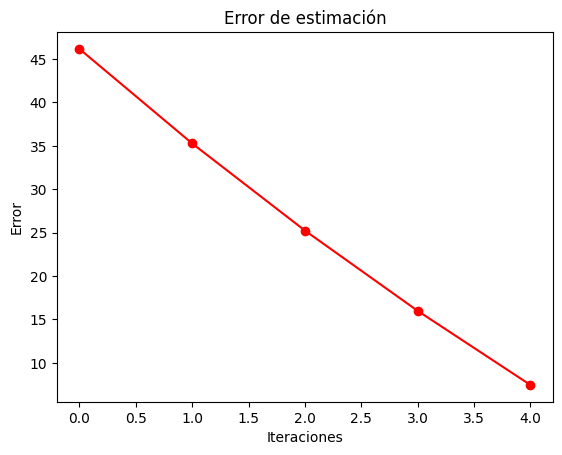

In [3]:
# graficamos el error de estimación
plt.plot(range(len(error)), error, 'o-', c='r')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Error de estimación')
plt.show()